## Time Series Made Easy in Python USing Darts Library

In [ ]:
!pip install darts

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 817.6/817.6 kB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 15.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 533.5/533.5 kB 27.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.9/110.9 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 776.9/776.9 kB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.7/101.7 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 806.1/806.1 kB 18.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 279.8/279.8 kB 28.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 7.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.2/169.

In [ ]:
import pandas as pd
df=pd.read_csv('/content/final_stance_april_file.csv')
def create_date_column(day, month, year):
    return pd.Timestamp(year=year, month=month, day=day)

# Add the new date column to the DataFrame
df['date'] = df['day'].apply(lambda day: create_date_column(day, 4, 2016))

# Display the DataFrame
df=df[['support_for_trump','support_for_hilary','date']]

In [ ]:
df.head()

,support_for_trump,support_for_hilary,date
0,20208,4964,2016-04-04
1,15061,4632,2016-04-05
2,1027,1915,2016-04-06
3,7549,2319,2016-04-03
4,1041,3082,2016-04-16


# example

In [ ]:
from darts.datasets import AirPassengersDataset, MonthlyMilkDataset

In [ ]:
AirPassengersDataset().load().pd_series()

Month
1949-01-01    112.0
1949-02-01    118.0
1949-03-01    132.0
1949-04-01    129.0
1949-05-01    121.0
              ...  
1960-08-01    606.0
1960-09-01    508.0
1960-10-01    461.0
1960-11-01    390.0
1960-12-01    432.0
Freq: MS, Name: #Passengers, Length: 144, dtype: float64

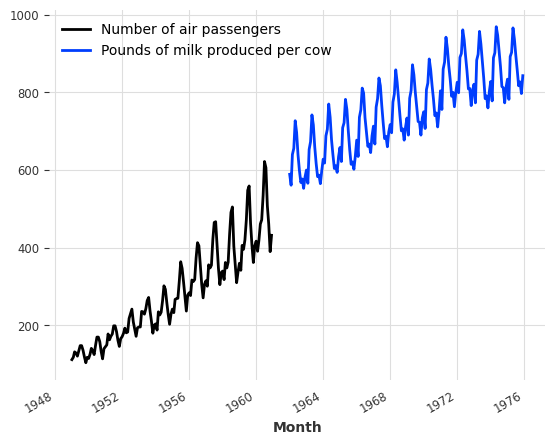

In [ ]:
import matplotlib.pyplot as plt
series_air = AirPassengersDataset().load()
series_milk = MonthlyMilkDataset().load()

series_air.plot(label='Number of air passengers')
series_milk.plot(label='Pounds of milk produced per cow')
plt.legend();

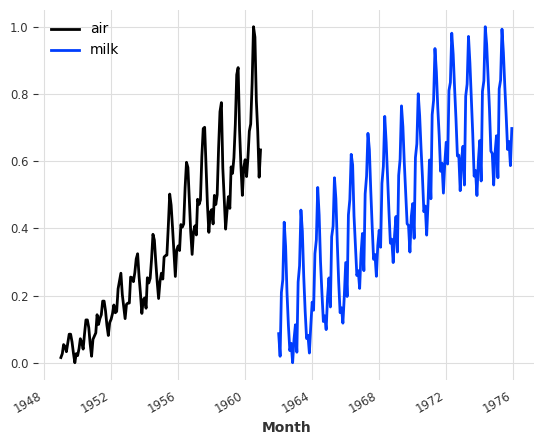

In [ ]:
from darts.dataprocessing.transformers import Scaler
scaler_air, scaler_milk = Scaler(), Scaler()
series_air_scaled = scaler_air.fit_transform(series_air)
series_milk_scaled = scaler_milk.fit_transform(series_milk)

series_air_scaled.plot(label='air')
series_milk_scaled.plot(label='milk')
plt.legend();

In [ ]:
# Train And Validation Split
train_air, val_air = series_air_scaled[:-36], series_air_scaled[-36:]
train_milk, val_milk = series_milk_scaled[:-36], series_milk_scaled[-36:]

In [ ]:
from darts import TimeSeries
from darts.utils.timeseries_generation import gaussian_timeseries, linear_timeseries, sine_timeseries
from darts.models import RNNModel, TCNModel, TransformerModel, NBEATSModel, BlockRNNModel
from darts.metrics import mape, smape

In [ ]:
model_air_milk = NBEATSModel(input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

In [ ]:
model_air_milk.fit([train_air, train_milk], verbose=True)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.2 M 
---------------------------------------------------
6.2 M     Trainable params
1.4 K     Non-trainable params
6.2 M     Total params
24.787    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0)

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 7.16%


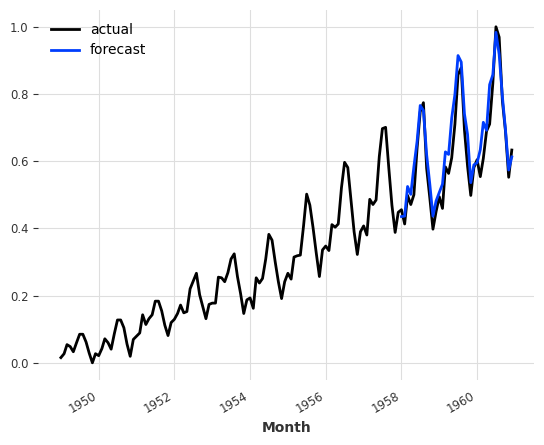

In [ ]:
pred = model_air_milk.predict(n=36, series=train_air)

series_air_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_air_scaled, pred)))

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE = 13.34%


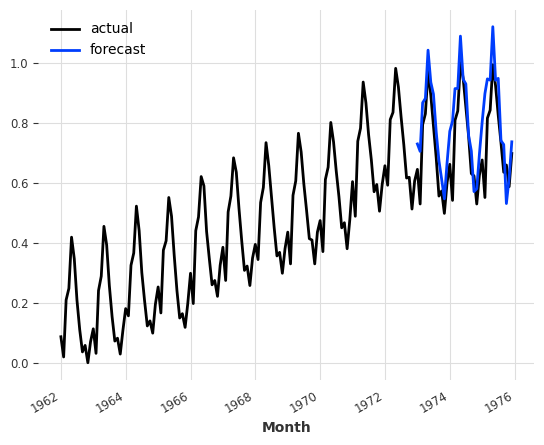

In [ ]:
pred = model_air_milk.predict(n=36, series=train_milk)

series_milk_scaled.plot(label='actual')
pred.plot(label='forecast')
plt.legend();
print('MAPE = {:.2f}%'.format(mape(series_milk_scaled, pred)))

# our dataset - April month

In [ ]:
df.info(

)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   support_for_trump   30 non-null     int64         
 1   support_for_hilary  30 non-null     int64         
 2   date                30 non-null     datetime64[ns]
dtypes: datetime64[ns](1), int64(2)
memory usage: 848.0 bytes


In [ ]:
import pandas as pd
from darts import TimeSeries
from darts.models import NBEATSModel
from darts.metrics import mape
from darts.dataprocessing.transformers import Scaler
import matplotlib.pyplot as plt


In [ ]:
df['date'] = pd.to_datetime(df['date'])  # Ensure 'date' column is datetime
df.sort_values('date', inplace=True)

In [ ]:
# Prepare time series data
ts_support_trump = TimeSeries.from_dataframe(df, 'date', 'support_for_trump')
ts_support_hilary = TimeSeries.from_dataframe(df, 'date', 'support_for_hilary')


In [ ]:
# Prepare time series data
ts_support_trump = TimeSeries.from_dataframe(df, 'date', 'support_for_trump')
ts_support_hilary = TimeSeries.from_dataframe(df, 'date', 'support_for_hilary')


In [ ]:
# Normalize the data
scaler_trump, scaler_hilary = Scaler(), Scaler()
ts_support_trump_scaled = scaler_trump.fit_transform(ts_support_trump)
ts_support_hilary_scaled = scaler_hilary.fit_transform(ts_support_hilary)


In [ ]:
# Train and validation split
train_trump, val_trump = ts_support_trump_scaled.split_before(0.8)
train_hilary, val_hilary = ts_support_hilary_scaled.split_before(0.8)


In [ ]:
# Adjusting the model parameters
input_chunk_length = 12  # Reduced from 24
output_chunk_length = 6   # Reduced from 12

# Redefine the model with the new parameters
model = NBEATSModel(input_chunk_length=input_chunk_length, output_chunk_length=output_chunk_length, n_epochs=100, random_state=0)

# Train the model
model.fit([train_trump, train_hilary], verbose=True)


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.406    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.


NBEATSModel(generic_architecture=True, num_stacks=30, num_blocks=1, num_layers=4, layer_widths=256, expansion_coefficient_dim=5, trend_polynomial_degree=2, dropout=0.0, activation=ReLU, input_chunk_length=12, output_chunk_length=6, n_epochs=100, random_state=0)

In [ ]:
# Predictions
pred_trump = model.predict(len(val_trump), series=train_trump)
pred_hilary = model.predict(len(val_hilary), series=train_hilary)

# De-normalize predictions
pred_trump = scaler_trump.inverse_transform(pred_trump)
pred_hilary = scaler_hilary.inverse_transform(pred_hilary)

# Calculate MAPE
mape_trump = mape(val_trump, pred_trump)
mape_hilary = mape(val_hilary, pred_hilary)

print(f'MAPE for Trump Support: {mape_trump:.2f}%')
print(f'MAPE for Hillary Support: {mape_hilary:.2f}%')


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

MAPE for Trump Support: 1020815.72%
MAPE for Hillary Support: 432534.18%


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.404    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

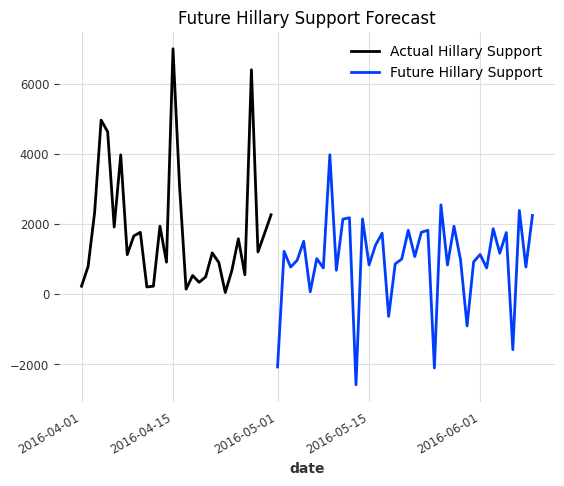

In [28]:
# Assuming ts_support_hilary_scaled contains the full scaled time series data for Hillary's support

# Define and train the model on the full dataset
model = NBEATSModel(input_chunk_length=12, output_chunk_length=4, n_epochs=100, random_state=0)
model.fit([ts_support_hilary_scaled], verbose=True)

# Predict future data points, `n` is the number of future data points you want to predict
n = 40  # For example, predicting 12 future data points
future_pred_hilary = model.predict(n)

# De-normalize predictions if the series was scaled
future_pred_hilary = scaler_hilary.inverse_transform(future_pred_hilary)
ts_support_hilary_scaledd = scaler_hilary.inverse_transform(ts_support_hilary_scaled)
# Plot future predictions

ts_support_hilary_scaledd.plot(label='Actual Hillary Support')
future_pred_hilary.plot(label='Future Hillary Support')
plt.legend()
plt.title("Future Hillary Support Forecast")
plt.show()


INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO:pytorch_lightning.callbacks.model_summary:
  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | stacks        | ModuleList       | 6.1 M 
---------------------------------------------------
6.1 M     Trainable params
1.4 K     Non-trainable params
6.1 M     Total params
24.404    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

INFO:pytorch_lightning.utilities.rank_zero:`Trainer.fit` stopped: `max_epochs=100` reached.
INFO:pytorch_lightning.utilities.rank_zero:GPU available: False, used: False
INFO:pytorch_lightning.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO:pytorch_lightning.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO:pytorch_lightning.utilities.rank_zero:HPU available: False, using: 0 HPUs


Predicting: |          | 0/? [00:00<?, ?it/s]

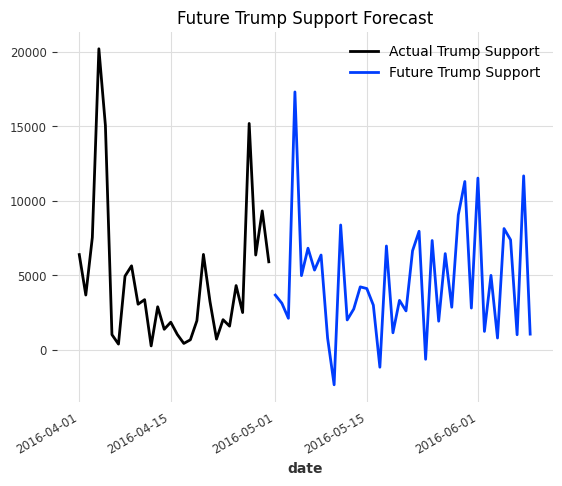

In [29]:
# Define and train the model on the full dataset for Trump's support
model_trump = NBEATSModel(input_chunk_length=12, output_chunk_length=4, n_epochs=100, random_state=0)
model_trump.fit([ts_support_trump_scaled], verbose=True)

# Predict future data points for Trump's support
n = 40  # Replace with the number of future points you want to forecast
future_pred_trump = model_trump.predict(n)

# De-normalize predictions if necessary
future_pred_trump = scaler_trump.inverse_transform(future_pred_trump)
ts_support_trump_scaledd = scaler_trump.inverse_transform(ts_support_trump_scaled)
# Plot the forecast alongside actual past data
ts_support_trump_scaledd.plot(label='Actual Trump Support')
future_pred_trump.plot(label='Future Trump Support')
plt.legend()
plt.title("Future Trump Support Forecast")
plt.show()


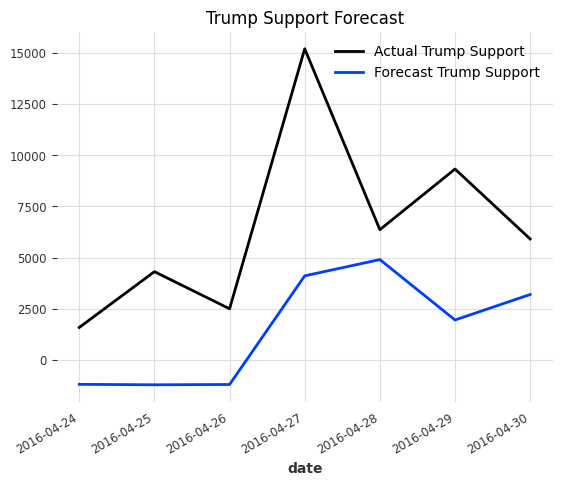

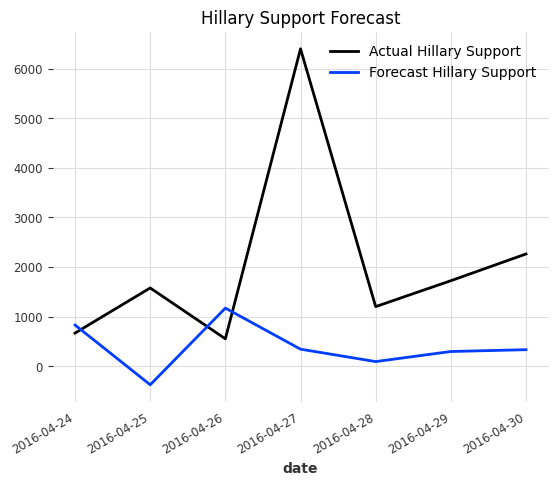

In [30]:
# De-normalize predictions
val_trumpp = scaler_trump.inverse_transform(val_trump)
val_hilaryy = scaler_hilary.inverse_transform(val_hilary)

# Plot actual vs forecast
val_trumpp.plot(label='Actual Trump Support')
pred_trump.plot(label='Forecast Trump Support')
plt.legend()
plt.title("Trump Support Forecast")
plt.show()

val_hilaryy.plot(label='Actual Hillary Support')
pred_hilary.plot(label='Forecast Hillary Support')
plt.legend()
plt.title("Hillary Support Forecast")
plt.show()
